# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

# Load The Dataset

In [6]:
df=pd.read_excel("covid19_clinical_dataset.xlsx")

# Initial Dataset Shape

In [7]:
df.shape

(5644, 111)

# Drop Total Empty Columns 

In [8]:
df.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)

In [9]:
df.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False).shape
#Total 5 Columns are Drop

(5644, 106)

In [10]:
def missing_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df.nunique()
        mz_table['Data Type'] = df.dtypes
        
        mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('% of Total Missing Values', ascending=True).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
               "There are " + str(mz_table.shape[0]) + " columns that have missing values.")

        return mz_table

missing_values_table(df)

Your selected dataframe has 106 columns and 5644 Rows.
There are 100 columns that have missing values.


,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
Influenza A,0,4290,76.0,2,object
Respiratory Syncytial Virus,0,4290,76.0,2,object
Influenza B,0,4290,76.0,2,object
Rhinovirus/Enterovirus,0,4292,76.0,2,object
CoronavirusNL63,0,4292,76.0,2,object
Coronavirus HKU1,0,4292,76.0,2,object
Parainfluenza 3,0,4292,76.0,2,object
Chlamydophila pneumoniae,0,4292,76.0,2,object
Adenovirus,0,4292,76.0,2,object
Coronavirus229E,0,4292,76.0,2,object


In [12]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [13]:
df = df.rename({'Patient addmited to regular ward (1=yes, 0=no)': 'regular_ward','Patient addmited to semi-intensive unit (1=yes, 0=no)': 'semi_intensive','Patient addmited to intensive care unit (1=yes, 0=no)': 'intensive'}, axis=1)

In [14]:
df = df.rename({'SARS-Cov-2 exam result': 'SARS_Cov_2_exam_result'}, axis=1)

# Cleaning The Dataset

In [16]:
df.dropna(thresh=21).shape

(1600, 106)

In [17]:
df=df.dropna(thresh=21)

In [18]:
def missing_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df.nunique()
        mz_table['Data Type'] = df.dtypes
        
        mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('% of Total Missing Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
               "There are " + str(mz_table.shape[0]) + " columns that have missing values.")

        return mz_table

missing_values_table(df)

Your selected dataframe has 106 columns and 1600 Rows.
There are 100 columns that have missing values.


,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
Fio2 (venous blood gas analysis),1,1599,99.9,1,float64
Urine - Nitrite,0,1599,99.9,1,object
Vitamin B12,0,1597,99.8,3,float64
Lipase dosage,0,1592,99.5,7,float64
Albumin,0,1588,99.2,9,float64
Phosphor,0,1580,98.8,16,float64
Arteiral Fio2,0,1580,98.8,9,float64
Ferritin,0,1577,98.6,23,float64
Hb saturation (arterial blood gases),0,1573,98.3,23,float64
Arterial Lactic Acid,0,1573,98.3,13,float64


# Drop column having maximum null values

In [19]:
df.dropna(thresh=1200,axis=1).shape

(1600, 23)

In [20]:
df=df.dropna(thresh=1200,axis=1)

In [21]:
def missing_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df.nunique()
        mz_table['Data Type'] = df.dtypes
        
        mz_table = mz_table.sort_values('% of Total Missing Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
               "There are " + str(mz_table.shape[0]) + " columns that have missing values.")

        return mz_table

missing_values_table(df)

Your selected dataframe has 23 columns and 1600 Rows.
There are 23 columns that have missing values.


,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
Rhinovirus/Enterovirus,0,248,15.5,2,object
Coronavirus HKU1,0,248,15.5,2,object
Metapneumovirus,0,248,15.5,2,object
Bordetella pertussis,0,248,15.5,2,object
Inf A H1N1 2009,0,248,15.5,2,object
CoronavirusOC43,0,248,15.5,2,object
Coronavirus229E,0,248,15.5,2,object
Parainfluenza 4,0,248,15.5,2,object
Adenovirus,0,248,15.5,2,object
Chlamydophila pneumoniae,0,248,15.5,2,object


In [22]:
for col in df.columns:
    if df[col].dtype=="object":
        print('**************************************',col,'******************************************')
        print()
        print('No. of unique attributes:',df[col].nunique())
        print()
        print('No. of unique attributes:',df[col].unique())
        print()

************************************** Patient ID ******************************************

No. of unique attributes: 1600

No. of unique attributes: ['126e9dd13932f68' 'd9e41465789c2b5' '8bb9d64f0215244' ...
 'db77903261ab6d0' 'c20c44766f28291' '2697fdccbfeb7f7']

************************************** SARS_Cov_2_exam_result ******************************************

No. of unique attributes: 2

No. of unique attributes: ['negative' 'positive']

************************************** Respiratory Syncytial Virus ******************************************

No. of unique attributes: 2

No. of unique attributes: ['not_detected' 'detected' nan]

************************************** Influenza A ******************************************

No. of unique attributes: 2

No. of unique attributes: ['not_detected' nan 'detected']

************************************** Influenza B ******************************************

No. of unique attributes: 2

No. of unique attributes: ['not_detected

# Fill the null Values

In [15]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS_Cov_2_exam_result',
       'regular_ward', 'semi_intensive', 'intensive', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=106)

In [23]:
df['Respiratory Syncytial Virus'].fillna(df['Respiratory Syncytial Virus'].value_counts().index[0],inplace=True)

In [24]:
df['Influenza A'].fillna(df['Influenza A'].value_counts().index[0],inplace=True)
df['Influenza B'].fillna(df['Influenza B'].value_counts().index[0],inplace=True)
df['Parainfluenza 1'].fillna(df['Parainfluenza 1'].value_counts().index[0],inplace=True)
df['CoronavirusNL63'].fillna(df['CoronavirusNL63'].value_counts().index[0],inplace=True)
df['Rhinovirus/Enterovirus'].fillna(df['Rhinovirus/Enterovirus'].value_counts().index[0],inplace=True)
df['Coronavirus HKU1'].fillna(df['Coronavirus HKU1'].value_counts().index[0],inplace=True)
df['Parainfluenza 3'].fillna(df['Parainfluenza 3'].value_counts().index[0],inplace=True)
df['Coronavirus229E'].fillna(df['Coronavirus229E'].value_counts().index[0],inplace=True)
df['CoronavirusOC43'].fillna(df['CoronavirusOC43'].value_counts().index[0],inplace=True)
df['Inf A H1N1 2009'].fillna(df['Inf A H1N1 2009'].value_counts().index[0],inplace=True)
df['Bordetella pertussis'].fillna(df['Bordetella pertussis'].value_counts().index[0],inplace=True)
df['Metapneumovirus'].fillna(df['Metapneumovirus'].value_counts().index[0],inplace=True)
df['Parainfluenza 2'].fillna(df['Parainfluenza 2'].value_counts().index[0],inplace=True)

In [25]:
df['Chlamydophila pneumoniae'].fillna(df['Chlamydophila pneumoniae'].value_counts().index[0],inplace=True)
df['Adenovirus'].fillna(df['Adenovirus'].value_counts().index[0],inplace=True)
df['Parainfluenza 4'].fillna(df['Parainfluenza 4'].value_counts().index[0],inplace=True)

In [27]:
df.isnull().sum()

Patient ID                     0
Patient age quantile           0
SARS_Cov_2_exam_result         0
regular_ward                   0
semi_intensive                 0
intensive                      0
Respiratory Syncytial Virus    0
Influenza A                    0
Influenza B                    0
Parainfluenza 1                0
CoronavirusNL63                0
Rhinovirus/Enterovirus         0
Coronavirus HKU1               0
Parainfluenza 3                0
Chlamydophila pneumoniae       0
Adenovirus                     0
Parainfluenza 4                0
Coronavirus229E                0
CoronavirusOC43                0
Inf A H1N1 2009                0
Bordetella pertussis           0
Metapneumovirus                0
Parainfluenza 2                0
dtype: int64

# Binary Categorical Attribures

# 1.Label Encoading

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
df['SARS_Cov_2_exam_result'] = le.fit_transform(df['SARS_Cov_2_exam_result'])

In [31]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col] = le.fit_transform(df[col])

In [32]:
df_final = df.drop(['Patient ID'],axis=1,inplace=False)

In [33]:
df.head(2)

,Patient ID,Patient age quantile,SARS_Cov_2_exam_result,regular_ward,semi_intensive,intensive,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
1,141,17,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0
4,1361,15,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0


In [34]:
df_final.head(2)

,Patient age quantile,SARS_Cov_2_exam_result,regular_ward,semi_intensive,intensive,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
1,17,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0
4,15,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0


In [35]:
def missing_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df.nunique()
        mz_table['Data Type'] = df.dtypes
        
        mz_table = mz_table.sort_values('% of Total Missing Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
               "There are " + str(mz_table.shape[0]) + " columns that have missing values.")

        return mz_table

missing_values_table(df)

Your selected dataframe has 23 columns and 1600 Rows.
There are 23 columns that have missing values.


,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
Patient ID,1,0,0.0,1600,int32
Coronavirus HKU1,20,0,0.0,2,int32
Metapneumovirus,14,0,0.0,2,int32
Bordetella pertussis,2,0,0.0,2,int32
Inf A H1N1 2009,98,0,0.0,2,int32
CoronavirusOC43,8,0,0.0,2,int32
Coronavirus229E,9,0,0.0,2,int32
Parainfluenza 4,19,0,0.0,2,int32
Adenovirus,13,0,0.0,2,int32
Chlamydophila pneumoniae,9,0,0.0,2,int32


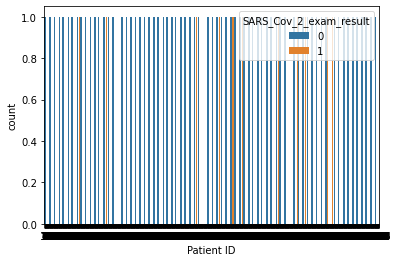

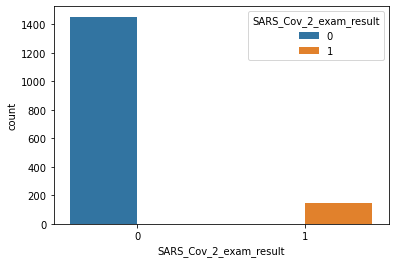

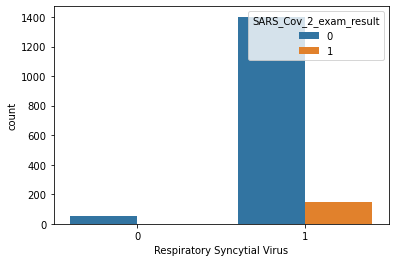

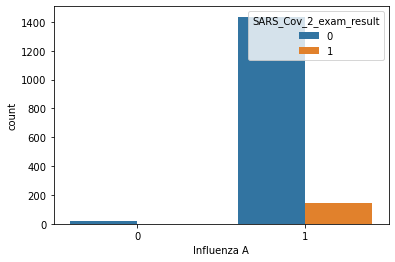

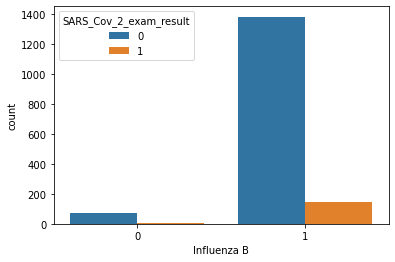

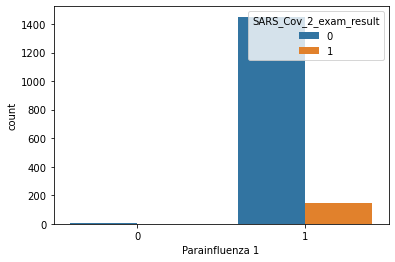

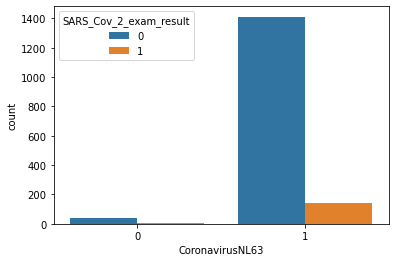

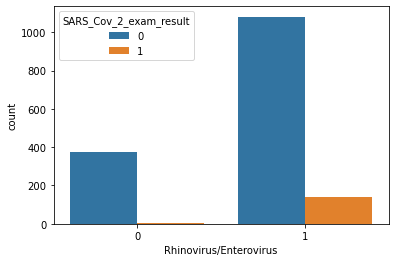

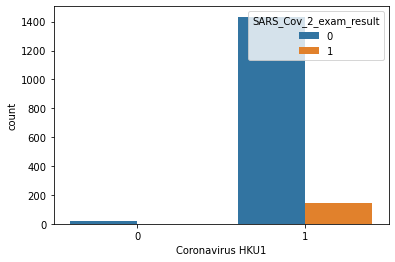

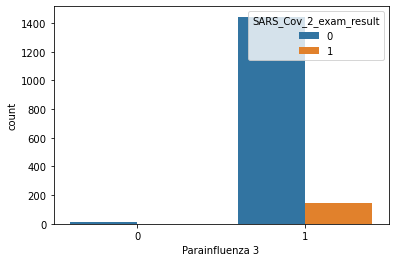

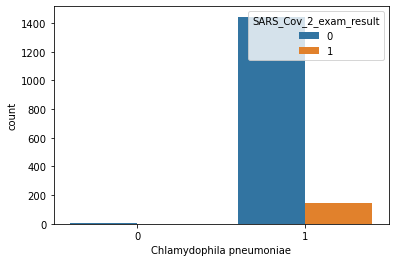

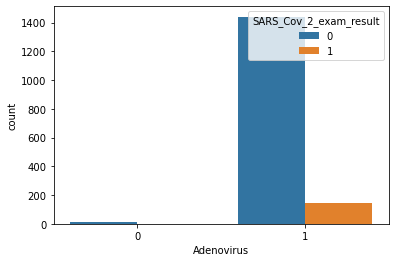

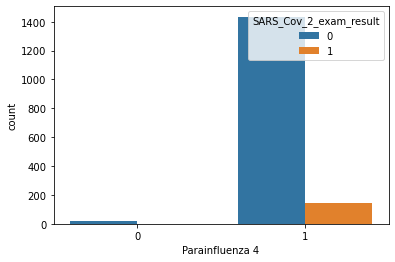

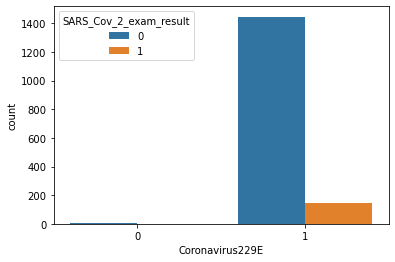

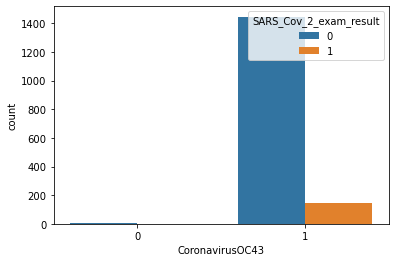

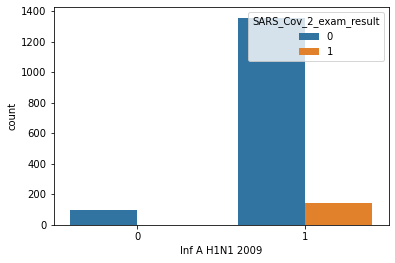

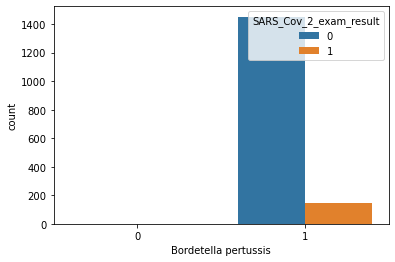

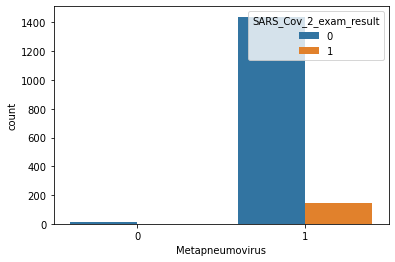

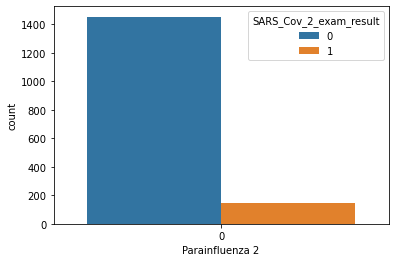

In [36]:
for col in df.columns:
    if df[col].dtype=="int32":
        sns.countplot(x=df[col], hue="SARS_Cov_2_exam_result", data=df)
        plt.show()

<AxesSubplot:xlabel='SARS_Cov_2_exam_result', ylabel='count'>

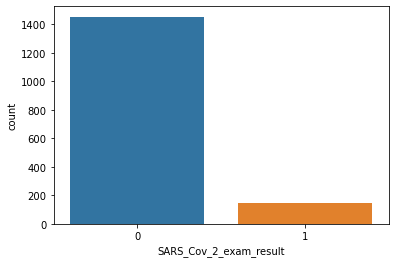

In [37]:
sns.countplot(x="SARS_Cov_2_exam_result", data=df)

In [38]:
df_final.corr()

,Patient age quantile,SARS_Cov_2_exam_result,regular_ward,semi_intensive,intensive,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
Patient age quantile,1.000000,0.141458,0.105963,0.033032,-0.060888,0.223885,0.006520,0.109609,-0.023695,-0.019055,0.115693,-0.036952,-0.039851,-0.006485,0.124408,0.088958,-0.005100,0.004333,0.076106,0.031486,0.041343,NaN
SARS_Cov_2_exam_result,0.141458,1.000000,0.271781,0.044451,0.060473,0.058078,0.033801,0.040152,0.013734,0.014523,0.145916,0.035652,0.025130,0.023833,0.028680,0.034738,-0.005187,0.022463,0.080942,0.011210,0.029772,NaN
regular_ward,0.105963,0.271781,1.000000,-0.038019,-0.034251,-0.012493,0.022816,0.019035,0.009271,0.017905,0.054486,0.024065,-0.021810,0.016088,0.019359,0.023448,0.016088,0.015163,0.041893,0.007567,-0.012714,NaN
semi_intensive,0.033032,0.044451,-0.038019,1.000000,-0.028462,-0.110618,0.018959,0.005585,0.007704,0.008296,-0.011886,-0.045301,-0.031932,0.013368,-0.024320,0.019485,0.013368,0.012600,0.030274,0.006288,0.016700,NaN
intensive,-0.060888,0.060473,-0.034251,-0.028462,1.000000,-0.173833,0.017081,0.016938,0.006940,0.003027,-0.004943,0.018016,0.012699,0.012044,-0.030100,0.017554,0.012044,0.011351,0.007513,0.005665,0.015045,NaN
Respiratory Syncytial Virus,0.223885,0.058078,-0.012493,-0.110618,-0.173833,1.000000,-0.019550,-0.040929,-0.007944,-0.031179,0.005658,0.011103,-0.014535,-0.013785,0.061936,0.012446,-0.013785,-0.012992,-0.046816,-0.006484,-0.017220,NaN
Influenza A,0.006520,0.033801,0.022816,0.018959,0.017081,-0.019550,1.000000,-0.023820,-0.004623,-0.018146,-0.059429,-0.012001,-0.008459,-0.008023,-0.009654,0.043013,-0.008023,-0.007561,0.121034,-0.003774,-0.010022,NaN
Influenza B,0.109609,0.040152,0.019035,0.005585,0.016938,-0.040929,-0.023820,1.000000,-0.009679,-0.020216,-0.048395,-0.025125,-0.017710,0.022493,0.012520,-0.024481,-0.016796,-0.015830,-0.044788,-0.007900,0.010569,NaN
Parainfluenza 1,-0.023695,0.013734,0.009271,0.007704,0.006940,-0.007944,-0.004623,-0.009679,1.000000,-0.007373,-0.024147,-0.004876,-0.003437,-0.003260,-0.003923,-0.004751,-0.003260,-0.003072,-0.011071,-0.001533,-0.004072,NaN
CoronavirusNL63,-0.019055,0.014523,0.017905,0.008296,0.003027,-0.031179,-0.018146,-0.020216,-0.007373,1.000000,-0.023646,-0.019139,0.034477,-0.012795,0.068824,-0.018649,-0.012795,-0.012059,-0.027688,-0.006018,-0.015983,NaN


# Define the variables

In [39]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS_Cov_2_exam_result',
       'regular_ward', 'semi_intensive', 'intensive',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2'],
      dtype='object')

In [41]:
df_x=df.drop(['Patient ID', 'SARS_Cov_2_exam_result',
       'regular_ward', 'semi_intensive', 'intensive',
       ],axis=1)

In [42]:
y=df_final["SARS_Cov_2_exam_result"]

# Evaluation Time

In [47]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_resample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [44]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    scores=cross_val_score(model,x,y,cv=5,scoring="roc_auc")
    print("Mean roc auc score for classifier: ",scores.mean())
    print("standard deviation in roc auc score for classifier: ",scores.std())
    print(scores)

# 1.Logistic Regression

In [48]:
#Lets chcek logistic regression
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,df_x,y)

auc roc score corresponding to  42  is  0.6834933048939448
auc roc score corresponding to  43  is  0.7542362839198958
auc roc score corresponding to  44  is  0.7404905794525417
auc roc score corresponding to  45  is  0.6784571631709918
auc roc score corresponding to  46  is  0.7128214243393767
auc roc score corresponding to  47  is  0.7644863135442588
auc roc score corresponding to  48  is  0.6749614883280008
auc roc score corresponding to  49  is  0.669629102974286
auc roc score corresponding to  50  is  0.6765612039341155
auc roc score corresponding to  51  is  0.7231899514160446
auc roc score corresponding to  52  is  0.7593909230951535
auc roc score corresponding to  53  is  0.6852707666785164
auc roc score corresponding to  54  is  0.678338665718687
auc roc score corresponding to  55  is  0.7300628036497215
auc roc score corresponding to  56  is  0.6748429908756962
auc roc score corresponding to  57  is  0.6661334281312952
auc roc score corresponding to  58  is  0.6938618319706127

47

In [49]:
#lets print the scores for logistic regression
print("LOGISTIC CLASSIFIER\n\n")
model_evaluation(lg_clf,df_x,y)

LOGISTIC CLASSIFIER


Mean roc auc score for classifier:  0.7359574594146227
standard deviation in roc auc score for classifier:  0.06924358145356703
[0.64225619 0.66222301 0.77586207 0.79571039 0.80373563]


# 2.Decision Tree Classifier

In [50]:
#Lets chcek the decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.6817750918355255
auc roc score corresponding to  43  is  0.6230003554923569
auc roc score corresponding to  44  is  0.7041711103211281
auc roc score corresponding to  45  is  0.6869297310107831
auc roc score corresponding to  46  is  0.6731840265434293
auc roc score corresponding to  47  is  0.7507406090769048
auc roc score corresponding to  48  is  0.7077260338902713
auc roc score corresponding to  49  is  0.6938618319706127
auc roc score corresponding to  50  is  0.6109136153572698
auc roc score corresponding to  51  is  0.6576016115653514
auc roc score corresponding to  52  is  0.7109847138286527
auc roc score corresponding to  53  is  0.678338665718687
auc roc score corresponding to  54  is  0.6697476004265909
auc roc score corresponding to  55  is  0.636923806138168
auc roc score corresponding to  56  is  0.6922028676383457
auc roc score corresponding to  57  is  0.7248489157483113
auc roc score corresponding to  58  is  0.7438085081170756

47

In [51]:
#Lets print the scores of decision tree
print("Decision tree CLASSIFIER\n\n")
model_evaluation(dc,df_x,y)

Decision tree CLASSIFIER


Mean roc auc score for classifier:  0.7017125251807087
standard deviation in roc auc score for classifier:  0.038743603799303306
[0.66228226 0.65452068 0.70458585 0.73338073 0.7537931 ]


# 3.Random Forest Classifier

In [52]:
#lets chcek random forest also
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=10,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [53]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.6179642137694039
auc roc score corresponding to  43  is  0.6971205119089939
auc roc score corresponding to  44  is  0.6610380376821898
auc roc score corresponding to  45  is  0.6454556227041117
auc roc score corresponding to  46  is  0.7041118615949757
auc roc score corresponding to  47  is  0.7023936485365565
auc roc score corresponding to  48  is  0.6731840265434293
auc roc score corresponding to  49  is  0.6713473160327053
auc roc score corresponding to  50  is  0.6437374096456926
auc roc score corresponding to  51  is  0.6627562507406091
auc roc score corresponding to  52  is  0.705830074653395
auc roc score corresponding to  53  is  0.7093849982225382
auc roc score corresponding to  54  is  0.6834933048939448
auc roc score corresponding to  55  is  0.636923806138168
auc roc score corresponding to  56  is  0.7162578504562152
auc roc score corresponding to  57  is  0.7316625192558359
auc roc score corresponding to  58  is  0.7438085081170756

91

In [54]:
#Lets print the scores of Random Forest Classifier
print("Random Forest Classifier\n\n")
model_evaluation(rf_clf,df_x,y)

Random Forest Classifier


Mean roc auc score for classifier:  0.704258916933286
standard deviation in roc auc score for classifier:  0.04343590382816036
[0.66927361 0.63941225 0.71898329 0.73770589 0.75591954]


# 4.KNN Classifier

In [56]:
#lets chcek KNN
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_neighbors': 18}

In [57]:
kc=KNeighborsClassifier(n_neighbors=18)
max_aucroc_score(kc,df_x,y)

auc roc score corresponding to  42  is  0.5972864083422206
auc roc score corresponding to  43  is  0.4886834933048939
auc roc score corresponding to  44  is  0.7232492001421968
auc roc score corresponding to  45  is  0.6283327408460718
auc roc score corresponding to  46  is  0.6541651854485129
auc roc score corresponding to  47  is  0.636923806138168
auc roc score corresponding to  48  is  0.6491882924517123
auc roc score corresponding to  49  is  0.6420191965872734
auc roc score corresponding to  50  is  0.6025002962436308
auc roc score corresponding to  51  is  0.5662993245645219
auc roc score corresponding to  52  is  0.7059485721056997
auc roc score corresponding to  53  is  0.6420784453134257
auc roc score corresponding to  54  is  0.6559426472330845
auc roc score corresponding to  55  is  0.6008413319113639
auc roc score corresponding to  56  is  0.6732432752695816
auc roc score corresponding to  57  is  0.65434293162697
auc roc score corresponding to  58  is  0.5869771299917051


44

In [58]:
#Lets print the scores of KNeighborsClassifier
print("K Neighbors Classifier\n\n")
model_evaluation(kc,df_x,y)

K Neighbors Classifier


Mean roc auc score for classifier:  0.6745427183315559
standard deviation in roc auc score for classifier:  0.06464130371099117
[0.6025003  0.64984003 0.67087333 0.79559189 0.65390805]


# Prediction

In [68]:
lg_clf=LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 47,test_size=0.050,stratify=y)
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
lg_clf.fit(x_train,y_train)
y_pred=lg_clf.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[50 23]
 [ 0  7]]
f1 score is :  0.37837837837837834
classification report 
               precision    recall  f1-score   support

           0       1.00      0.68      0.81        73
           1       0.23      1.00      0.38         7

    accuracy                           0.71        80
   macro avg       0.62      0.84      0.60        80
weighted avg       0.93      0.71      0.77        80

AUC ROC Score:  0.8424657534246576


# Low accuracy due to Lot of Noise
We need More data to get the accuracy